In [25]:
%run func_def.ipynb

imports loaded.

> Pre-Processing func:
    get_height(item)
    get_weight(item)
    get_reach(item)
    get_std_reach(item, height, reach_list, height_list)
    get_age(item)
    get_std_age(item, age_list)
    get_win_perc(name, date, df)
    get_lose_streak_data_frame(name, date, df)
    get_win_streak_data_frame(name, date, df)
    get_streak_data_frame(name, date, df)
    get_win_streak(name, date, df)
    get_lose_streak(name, date, df)
    get_fighter_stats(name, data )
    add_columns(data, column_list)

> outlier_cleaning func:
    set_outlier_detection_model(X_columns, data)

> Feature Engineering func:
    get_stat(index, data, stat='height', fo='')
    get_swaped_row(index, data)
    get_wins(combo, data)
    get_wins_ratio(combo, data)

> stats_model_training func:
    set_train_test(X_columns, y_columns, data, test_size=0.3, valid_size=0.3)
    set_xgboost_reg(X_columns, y_columns, data, n=200, learning_rate=0.2, subsample=0.4, max_depth=5)
    get_sig_features(data, sig

### <span style='color:green'> **[done]** </span>Loading Feature's-ready data

In [26]:
loc = '../data/'
#file = 'ufc_data_features.csv'
file = 'ufc_data_features_no_outliers.csv'
df = pd.read_csv(loc+file)
#df = df[df.columns[1:]]
df.tail(3)

,result,fighter,opponent,date,weight class,method,kd_dif,str_dif,td_dif,sub_dif,td avg._dif,td acc._dif,td def._dif,sub. avg._dif,slpm_dif,str. acc._dif,sapm_dif,str. def_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif
5541,win,Aleksandra Albu,Kailin Curran,2017-07-29,Women's Strawweight,U-DEC:,0.011068,-0.133163,1.590190,0.001133,0.157318,-0.236546,0.544717,-0.194404,0.584680,0.331559,0.477663,-1.248515,0.270739,2.060202,0.599149,-2.164903
5542,win,Jarred Brooks,Eric Shelton,2017-07-29,Flyweight,S-DEC:,0.011068,-0.133163,1.590190,0.001133,0.960129,0.218076,0.779264,0.377632,-0.294627,0.331559,-0.151239,-0.070965,-0.507334,0.015847,0.026948,-1.087573
5543,win,Drew Dober,Joshua Burkman,2017-07-29,Lightweight,KO/TKO:Punch,1.365610,0.167994,0.011143,0.001133,-0.985573,-0.656198,-0.594516,-0.194404,1.116061,-0.236000,0.611992,0.013146,0.985268,0.143619,0.026948,-2.164903


In [27]:
req_data = ['date','fighter','opponent','result','method']
y = ['kd_dif','str_dif','td_dif','sub_dif']
X = ['td avg._dif',
     'td acc._dif',
     'td def._dif',
     'sub. avg._dif',
     'slpm_dif',
     'str. acc._dif',
     'sapm_dif',
     'str. def_dif',
     'stance_win_ratio',
     'win_perc_dif',
     'win_strk_dif',
     'lose_strk_dif']
df = df[req_data + y + X]
df.head(3)

,date,fighter,opponent,result,method,kd_dif,str_dif,td_dif,sub_dif,td avg._dif,td acc._dif,td def._dif,sub. avg._dif,slpm_dif,str. acc._dif,sapm_dif,str. def_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif
0,2022-09-03,Ciryl Gane,Tai Tuivasa,win,KO/TKO:Punches,0.011068,3.066630,0.011143,0.001133,0.352446,0.742640,0.109127,0.472971,0.616310,0.736959,-1.231975,1.443028,-1.616731,0.399163,-2.834057,1.067086
1,2022-09-03,Robert Whittaker,Marvin Vettori,win,U-DEC:,0.011068,1.560845,0.405905,0.001133,-0.589742,-0.236546,0.343675,-0.575761,0.167167,-0.154920,-0.212298,0.181367,-1.616731,0.143619,-0.545253,1.067086
2,2022-09-03,Joaquin Buckley,Nassourdine Imavov,lose,U-DEC:,0.011068,-0.170807,-0.778380,-1.693534,0.229794,0.253047,-0.326462,-2.291867,-0.307279,-1.776519,0.587569,-0.659740,0.985268,-0.086371,0.599149,-0.010244


### <span style='color:green'> **[done]** </span>Feature's significanse:

---------------------------------------------
Correlation Report: Most significant features
---------------------------------------------
R coef > Median R: [0.19, 0.44, 0.3, 0.3, 0.3, 0.58, 0.19, 0.2, 0.38]
Most significant: ['sapm_dif', 'slpm_dif', 'str. acc._dif', 'str. def_dif', 'td def._dif', 'sub. avg._dif', 'td acc._dif', 'td avg._dif', 'td def._dif']


y,kd_dif,str_dif,sub_dif,td_dif
X,,,,
lose_strk_dif,0.04,0.03,0.0,0.01
sapm_dif,0.02,0.3,0.02,0.15
slpm_dif,0.16,0.44,0.01,0.06
stance_win_ratio,0.05,0.02,0.01,0.01
str. acc._dif,0.11,0.3,0.02,0.07
str. def_dif,0.07,0.3,0.02,0.12
sub. avg._dif,0.08,0.07,0.38,0.05
td acc._dif,0.06,0.14,0.01,0.19
td avg._dif,0.08,0.07,0.04,0.58


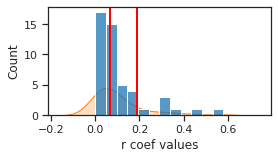

In [28]:
rdf = pd.DataFrame(columns=['y','X','r_coef'])
r_list = []
y_columns = ['kd_dif','str_dif','td_dif','sub_dif']
i = 0 
for y_column in y_columns:
    for x_column in X:
        rdf.loc[i, 'X'] = x_column
        rdf.loc[i, 'y'] = y_column
        rdf.loc[i, 'r_coef'] = np.round(np.abs(get_r_score(X=df[x_column], y=df[y_column])),2)
        r_list.append(rdf.loc[i, 'r_coef'])
        i += 1

rdf = rdf.pivot('X','y','r_coef')
print('---------------------------------------------')
print('Correlation Report: Most significant features')
print('---------------------------------------------')

sig_r =  [r for r in r_list if (r > (np.median(r_list)+np.std(r_list)) and r < 1)]
sig_features = get_sig_features(data=rdf, sig_r=sig_r)
print('R coef > Median R: %s' %(sig_r))
print('Most significant: %s' %(sig_features) )

g = plt.figure(figsize=(4,2))
g = sns.histplot(x = r_list, bins=len(rdf))
g = sns.kdeplot(x = r_list, fill=True)
plt.axvline(x = np.median(r_list)+np.std(r_list), color='red')
plt.axvline(x = np.median(r_list), color='red')
plt.xlabel("r coef values")
plt.ylabel("Count")

rdf

## <span style='color:orange'> **[in-progress]** </span> XGBoost regressor model training:

In [29]:
df = set_train_test(X_columns=X, y_columns=y, data=df, test_size=0.3, valid_size=0.3)
df.tail(3)

Data split: Data=(5544, 22), train_set=(2752, 12), validation_set=(1163, 12), test_set=(1629, 12)


,set,date,fighter,opponent,result,method,kd_dif,str_dif,td_dif,sub_dif,td avg._dif,td acc._dif,td def._dif,sub. avg._dif,slpm_dif,str. acc._dif,sapm_dif,str. def_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif
5541,test,2017-07-29,Aleksandra Albu,Kailin Curran,win,U-DEC:,0.011068,-0.133163,1.590190,0.001133,0.157318,-0.236546,0.544717,-0.194404,0.584680,0.331559,0.477663,-1.248515,0.270739,2.060202,0.599149,-2.164903
5542,train,2017-07-29,Jarred Brooks,Eric Shelton,win,S-DEC:,0.011068,-0.133163,1.590190,0.001133,0.960129,0.218076,0.779264,0.377632,-0.294627,0.331559,-0.151239,-0.070965,-0.507334,0.015847,0.026948,-1.087573
5543,train,2017-07-29,Drew Dober,Joshua Burkman,win,KO/TKO:Punch,1.365610,0.167994,0.011143,0.001133,-0.985573,-0.656198,-0.594516,-0.194404,1.116061,-0.236000,0.611992,0.013146,0.985268,0.143619,0.026948,-2.164903


In [30]:
xgboost_reg = set_xgboost_reg(X_columns=X, y_columns=y, data=df, n=200, learning_rate=0.2, subsample=0.4, max_depth=5)
df = set_predictions(model=xgboost_reg, X_columns=X, y_columns=y, data=df)
df.tail(3)

,set,date,fighter,opponent,result,method,kd_dif,str_dif,td_dif,sub_dif,td avg._dif,td acc._dif,td def._dif,sub. avg._dif,slpm_dif,str. acc._dif,sapm_dif,str. def_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif,kd_dif_pred,str_dif_pred,td_dif_pred,sub_dif_pred
5541,test,2017-07-29,Aleksandra Albu,Kailin Curran,win,U-DEC:,0.011068,-0.133163,1.590190,0.001133,0.157318,-0.236546,0.544717,-0.194404,0.584680,0.331559,0.477663,-1.248515,0.270739,2.060202,0.599149,-2.164903,-0.196005,-0.196005,-0.196005,-0.196005
5542,train,2017-07-29,Jarred Brooks,Eric Shelton,win,S-DEC:,0.011068,-0.133163,1.590190,0.001133,0.960129,0.218076,0.779264,0.377632,-0.294627,0.331559,-0.151239,-0.070965,-0.507334,0.015847,0.026948,-1.087573,-0.517491,-0.517491,-0.517491,-0.517491
5543,train,2017-07-29,Drew Dober,Joshua Burkman,win,KO/TKO:Punch,1.365610,0.167994,0.011143,0.001133,-0.985573,-0.656198,-0.594516,-0.194404,1.116061,-0.236000,0.611992,0.013146,0.985268,0.143619,0.026948,-2.164903,0.978277,0.978277,0.978277,0.978277


In [31]:
acc = []
for column in ['kd_dif','str_dif','td_dif','sub_dif']:
    act = df[column][df.set=='validation']
    pred = df[column+'_pred'][df.set=='validation'] 
    acc.append(np.round(get_mean_percentage_error(act=act, pred=pred),4))
    
print('Model Accuracy(=1 - (error/(normal range))): %f' %(np.mean(acc)))

Model Accuracy(=1 - (error/(normal range))): 0.852875


### <span style='color:orange'> **[in-progress]** </span>GridSearch (=Parameter tuning):

In [33]:
parameters = {'learning_rate': [0.05, 0.1, 0.15],
              'max_depth': [2, 3, 6],
              'subsample': [0.7, 0.8, 0.9],
              'n_estimators':[100, 200, 300]
}

xgboost_clf = XGBRegressor(objective='reg:squarederror') #objective='reg:squarederror')
grid_search = GridSearchCV(estimator=xgboost_clf, param_grid=parameters, cv=3,error_score='raise')

X_train = df[X][df.set=='train']
y_train = df[y][df.set=='train']
grid_search.fit(X_train,y_train)

print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best parameters:  {'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 100, 'subsample': 0.7}
Best score:  0.22971771595373477


In [42]:
grid = pd.DataFrame(grid_search.cv_results_['params'])
rmse = np.power(grid_search.cv_results_['mean_test_score'],0.5)

grid['rmse'] = np.power(grid_search.cv_results_['mean_test_score'],0.5) #grid_search.cv_results_['mean_test_score']
grid[grid.rmse==np.min(grid.rmse)]

,learning_rate,max_depth,n_estimators,subsample,rmse
78,0.15,6,300,0.7,0.282357


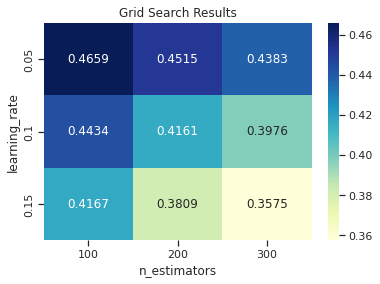

In [43]:
# Create a pivot table of the results
X_axis = 'n_estimators'
y_axis = 'learning_rate'
table = pd.pivot_table(grid, values='rmse', index=y_axis, columns=X_axis)

# Create a heatmap plot of the results
sns.heatmap(table, cmap='YlGnBu', annot=True, fmt='.4g')
plt.title('Grid Search Results')
plt.xlabel(X_axis)
plt.ylabel(y_axis)
plt.show()


## <span style='color:green'> **[done]** </span> Random Forest regression model training:

In [5]:
df = set_train_test(X_columns=X, y_columns=y, data=df, test_size=0.3, valid_size=0.3)
df.tail(3)

Data split: Data=(6731, 22), train_set=(3308, 12), validation_set=(1421, 12), test_set=(2002, 12)


,set,date,fighter,opponent,result,method,kd_dif,str_dif,td_dif,sub_dif,td avg._dif,td acc._dif,td def._dif,sub. avg._dif,slpm_dif,str. acc._dif,sapm_dif,str. def_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif
6728,test,2017-07-29,Aleksandra Albu,Kailin Curran,win,U-DEC:,0.011068,-0.133163,1.590190,0.001133,0.157318,-0.236546,0.544717,-0.194404,0.584680,0.331559,0.477663,-1.248515,0.270739,2.060202,0.599149,-2.164903
6729,train,2017-07-29,Jarred Brooks,Eric Shelton,win,S-DEC:,0.011068,-0.133163,1.590190,0.001133,0.960129,0.218076,0.779264,0.377632,-0.294627,0.331559,-0.151239,-0.070965,-0.507334,0.015847,0.026948,-1.087573
6730,validation,2017-07-29,Drew Dober,Joshua Burkman,win,KO/TKO:Punch,1.365610,0.167994,0.011143,0.001133,-0.985573,-0.656198,-0.594516,-0.194404,1.116061,-0.236000,0.611992,0.013146,0.985268,0.143619,0.026948,-2.164903


In [6]:
rf_reg = set_random_forest_reg(X_columns=X, y_columns=y, data=df, n_estimators=10)
df = set_predictions(model=rf_reg, X_columns=X, y_columns=y, data=df)
df.tail(3)

,set,date,fighter,opponent,result,method,kd_dif,str_dif,td_dif,sub_dif,td avg._dif,td acc._dif,td def._dif,sub. avg._dif,slpm_dif,str. acc._dif,sapm_dif,str. def_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif,kd_dif_pred,str_dif_pred,td_dif_pred,sub_dif_pred
6728,test,2017-07-29,Aleksandra Albu,Kailin Curran,win,U-DEC:,0.011068,-0.133163,1.590190,0.001133,0.157318,-0.236546,0.544717,-0.194404,0.584680,0.331559,0.477663,-1.248515,0.270739,2.060202,0.599149,-2.164903,0.021320,0.021320,0.021320,0.021320
6729,train,2017-07-29,Jarred Brooks,Eric Shelton,win,S-DEC:,0.011068,-0.133163,1.590190,0.001133,0.960129,0.218076,0.779264,0.377632,-0.294627,0.331559,-0.151239,-0.070965,-0.507334,0.015847,0.026948,-1.087573,-0.217887,-0.217887,-0.217887,-0.217887
6730,validation,2017-07-29,Drew Dober,Joshua Burkman,win,KO/TKO:Punch,1.365610,0.167994,0.011143,0.001133,-0.985573,-0.656198,-0.594516,-0.194404,1.116061,-0.236000,0.611992,0.013146,0.985268,0.143619,0.026948,-2.164903,-0.068744,-0.068744,-0.068744,-0.068744


In [7]:
acc = []
for column in ['kd_dif','str_dif','td_dif','sub_dif']:
    act = df[column][df.set=='validation']
    pred = df[column+'_pred'][df.set=='validation'] 
    acc.append(np.round(get_mean_percentage_error(act=act, pred=pred),4))
    
print('Model Accuracy(=1 - (error/(normal range))): %f' %(np.mean(acc)))

Model Accuracy(=1 - (error/(normal range))): 0.881775


#### <span style='color:green'> **[done]** </span> Tune Model parameters:

In [8]:
sum_table = pd.DataFrame(columns=['n_estimators','kd_accuracy','str_accuracy','td_accuracy','sub_accuracy','mean_accuracy'])

for n in tqdm([2,4,8,16,32,64,128,256]):
    sum_table = pd.concat([sum_table,get_grad_desc_step(X_columns=X, y_columns=y, data=df, n=n)],ignore_index=True)

sum_table.tail(5)

100%|██████████| 8/8 [00:08<00:00,  1.01s/it]


,n_estimators,kd_accuracy,str_accuracy,td_accuracy,sub_accuracy,mean_accuracy
3,16,0.8899,0.8895,0.8694,0.8834,0.8830
4,32,0.8922,0.8907,0.8718,0.8860,0.8852
5,64,0.8934,0.8908,0.8724,0.8871,0.8859
6,128,0.8948,0.8916,0.8728,0.8877,0.8867
7,256,0.8949,0.8919,0.8729,0.8878,0.8869


,n_estimators,kd_accuracy,str_accuracy,td_accuracy,sub_accuracy,mean_accuracy
0,256,0.8949,0.8919,0.8729,0.8878,0.8869


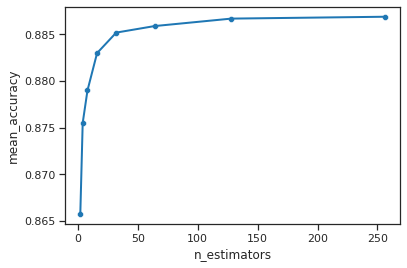

In [9]:
sns.scatterplot(data=sum_table, x='n_estimators', y='mean_accuracy')
sns.lineplot(data=sum_table, x='n_estimators', y='mean_accuracy')

t = sum_table[sum_table.mean_accuracy == np.max(sum_table['mean_accuracy'])].reset_index(drop=True)
opt_n_estimators = t.loc[0,'n_estimators']
opt_acc = t.loc[0,'mean_accuracy']
t

#### <span style='color:green'> **[done]** </span> Saving tuned parameters:

In [10]:
param = pd.DataFrame(data={'ml_model':['stats_random_forest_regressor'],
                          'parameter_name':['n_estimators'],
                          'value':[opt_n_estimators],
                          'accuracy':[opt_acc]}
                    )

param.to_csv('../global_variables/ml_models_parameters.csv', index=None)
print('../global_variables/ml_models_parameters.csv saved.')

../global_variables/ml_models_parameters.csv saved.


#### <span style='color:green'> **[done]** </span> Train model with chosen parameters:

In [11]:
rf_reg = set_random_forest_reg(X_columns=X, y_columns=y, data=df, n_estimators=opt_n_estimators)
df = set_predictions(model=rf_reg, X_columns=X, y_columns=y, data=df)
df.tail(3)

,set,date,fighter,opponent,result,method,kd_dif,str_dif,td_dif,sub_dif,td avg._dif,td acc._dif,td def._dif,sub. avg._dif,slpm_dif,str. acc._dif,sapm_dif,str. def_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif,kd_dif_pred,str_dif_pred,td_dif_pred,sub_dif_pred
6728,test,2017-07-29,Aleksandra Albu,Kailin Curran,win,U-DEC:,0.011068,-0.133163,1.590190,0.001133,0.157318,-0.236546,0.544717,-0.194404,0.584680,0.331559,0.477663,-1.248515,0.270739,2.060202,0.599149,-2.164903,0.122249,0.122249,0.122249,0.122249
6729,train,2017-07-29,Jarred Brooks,Eric Shelton,win,S-DEC:,0.011068,-0.133163,1.590190,0.001133,0.960129,0.218076,0.779264,0.377632,-0.294627,0.331559,-0.151239,-0.070965,-0.507334,0.015847,0.026948,-1.087573,-0.164508,-0.164508,-0.164508,-0.164508
6730,validation,2017-07-29,Drew Dober,Joshua Burkman,win,KO/TKO:Punch,1.365610,0.167994,0.011143,0.001133,-0.985573,-0.656198,-0.594516,-0.194404,1.116061,-0.236000,0.611992,0.013146,0.985268,0.143619,0.026948,-2.164903,0.168367,0.168367,0.168367,0.168367


#### <span style='color:green'> **[done]** </span> Saving model as pickle:

In [12]:
save_trained_model(model=rf_reg,filename_path='../global_variables/stats_pred_random_forest_reg')

../global_variables/stats_pred_random_forest_reg.pkl saved.


#### <span style='color:green'> **[done]** </span> Tuned model score:

In [13]:
print('Model Accuracy(=1-percentage error):')
acc = []
for stat in ['kd','str','sub','td']:
    act = df[stat + '_dif'][df.set=='test']
    pred = df[stat + '_dif_pred'][df.set=='test']
    acc.append(get_mean_percentage_error(act=act, pred=pred))
    print(stat + '_dif Accuracy: ' + str(get_mean_percentage_error(act=act, pred=pred)))
print('\nOverall score: %.4f' %np.mean(acc))    

Model Accuracy(=1-percentage error):
kd_dif Accuracy: 0.8927882120651185
str_dif Accuracy: 0.8847586064470139
sub_dif Accuracy: 0.8879020483303084
td_dif Accuracy: 0.8724792476440858

Overall score: 0.8845


#### <span style='color:green'> **[done]** </span> Saving statistic prediction data:

In [14]:
df.to_csv('../data/fight_stat_data_trained.csv', index=None)
print('../data/fight_stat_data_trained.csv saved.')

../data/fight_stat_data_trained.csv saved.
